# Решающие деревья

## Теоретическая часть

### Предсказания в решающих деревьях
__Вспомнить из лекции:__
* Что такое рашющее дерево? 
* Что такое предикат? Какие бывают предикаты? Какие предикаты чаще всего используются? 
* В чем отличие внутренних и листовых вершин решающего дерева?
* Как выполнить предсказание с помощью решающего дерева в задачах многоклассовой классификации и регрессии?

__На что обратить внимание__:
* В линейной классификации мы рассматривали бинарную и многоклассовую классификацию отдельно, потому что предсказание и обучение выполняется по-разному для этих двух случаев. В решающих деревьях бинарная и многоклассовая классификация выполняются одинаково.
* Предсказания можно сделать для любой точки признакового пространства, то есть для любого возможного объекта, а не только для объекта обучающей выборки. 
* Признаки в предикатах различных вершин могут повторяться.

### Задача 1
Рассмотрим задачу классификации на три класса по двум признакам и следующее решающее дерево: 

<div>
<img src="lab_09a_tree_class.png" width="350"/>
</div>

Какое предсказание это решающее дерево вернет для объекта $x=(7, 1.5)$? Под d1 и d2 подразумеваются первый и второй признак.

### Решение

**<u>Описание</u>**:
* $d1 = 7$<br><br>
* $d2 = 1.5$<br><br>
* $d1 < 3$? Нет<br><br>
* $d2 < 2$? Да

**Ответ: 2**


### Задача 2. 
Изобразите разделяющую поверхность для решающего дерева из предыдущей задачи.

_На что обратить внимание_: в этой задаче нет обучающей выборки, потому что предполагается, что решающее дерево уже задано, и наша задача - как бы сделать предсказания для всех возможных объектов пространства (отсюда и возникает разделяющая поверхность). Об обучении решающего дерева по конкретной выборке далее.


### Решение

**<u>Описание</u>**: Проводим вертикальную линию через $d1 = 3$, все что слева от нее $d1 = 3$ (ветка НЕТ). Аналогично со следующим условием, проводим горизонтальную линию через $d2 = 1$, все что ниже это $d2 < 1$ (ветка ДА), выше $d2 >= 1$ (ветка НЕТ). Получилось две области по левой ветке, первая где $d1 < 3$ и $d2 < 1$, вторая где $d1 >= 3$ и $d2 >= 1$ (то есть при проверке условий $d1 < 3$ и $d2 < 1$ ответы были НЕТ).

<div>
<img src="lab_09a_Task2.jpg" width="350"/>
</div>


### Задача 3
Рассмотрим задачу регрессии по одному признаку. Визуализируйте решающее правило    для следующего решающего дерева:

<div>
<img src="lab_09a_tree_reg.png" width="350"/>
</div>


### Решение

**<u>Описание</u>**: так составляется список, $[0.5]$ — элемент списка, $8$ — количество. Т.к. график на оси $x$ будет в интервале от $-1$ до $11$ с точками через каждые $0.5$, то точек, например, по оси $y$ лежащие на $1.8$ нужно будет $4$ штуки. Так как $y = 1.8$ будет по $x$ в промежутке $[7,9)$, то нам нужны точки по $x$ $7, 7.5, 8, 8.5$ ($4$ штуки). Этот график схематичный просто, то что точки будут с промежутком $0.5$ не обязательно, просто так нагляднее, мне показалось.

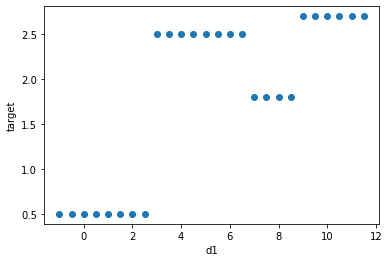

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-1, 12, 0.5) # координаты Х
y = [0.5] * 8 + [2.5] * 8 + [1.8] * 4 + [2.7] * 6 # координаты У
plt.scatter(x,y)  # отображение графика
plt.xlabel('d1') # название оси Х
plt.ylabel('target');  # название оси У


### Задача 4
Приведите пример решающего дерева, которое даст нулевую ошибку в задаче классификации по двум признакам, изображенной ниже. Изобразите само решающее дерево, а также изобразите получающуюся разделяющую поверхность на рисунке. Используйте предикаты вида [j-й признак < t].

<div>
<img src="lab_09a_ideal_task.png" width="350"/>
</div>


### Решение

**<u>Описание</u>**: Разделим плоскость на две половины предикатом $d1 < 3$ (вертикальная линия через $d1 = 3$). Левую половину разделим предикатом $d1 < 1$, тут слева останутся только зеленые объекты, а правую часть разделим по $d2 < 1.5$, снизу останутся фиолетовые, сверху желтые. Теперь вернемся к правой половине от деления $d1 < 3$. Поделим ее по $d1 < 3.5$, слева останутся желтые, справа зеленые.
<br><br>
<div>
<img src="lab_09a_Task4_1.jpg" width="350"/>
</div>

<div>
<img src="lab_09a_Task4_2.jpg" width="350"/>
</div>


__На что обратить внимание__: подобным способом можно для любой непротиворечивой выборки построить решающее дерево, имеющее нулевую ошибку на этой выборке. Этот факт обосновывает склонность решающих деревьев к переобучению. Под непротиворечивостью здесь подразумевается, что в выборке нет двух объектов с одинаковыми значениями признаков, но разными значениями целевой переменной.



### Обучение решающего дерева
__Непрерывная и дискретная оптимизация.__ Для обучения моделей, как правило, используются методы оптимизации. В зависимости от того, по каким переменным нужно выполнять оптимизацию, выделяют два вида оптимизации: непрерывную и дискретную. Непрерывная оптимизация выполняется по вещественным числам, часто здесь используют градиентные методы. С помощью непрерывной оптимизации мы обучали линейные модели. Дискретная оптимизация выполняется по конечным множествам, для этого необходимо делать перебор по элементам множества. Делать полный перебор может быть очень долго, поэтому придумывают более эффективные алгоритмы, например один из самых простых - жадный алгоритм. С помощью жадной дискретной оптимизации мы будем обучать решающие деревья. В решающих деревьях нужно выбрать одно из всех возможных разбиений признакового пространства на области. Несмотря на то, что всего разбиений бесконечное число, разбиений, приводящих к разным предсказаниям на обучающей выборке, конечное число - между ними и нужно выбрать одно.

__Вспомнить из лекции:__
* Рекурсивный алгоритм построения решающего дерева.
* Какие вы знаете критерии останова при построении решающего дерева?
* Как выбрать, какое предсказание делать в листе для задачи регрессии и задачи классификации?

__Критерии информативности: интуиция.__ 
Когда мы строим одну вершину решающего дерева, мы разбиваем выборку на две подвыборки: одна подвыборка будет использоваться при построении левого поддерева, вторая - при построении правого поддерева. 
Какую цель мы преследуем, когда разбиваем выборку на две подвыборки? Каких свойств мы хотим от получающихся подвыборок? Можно придумать разные ответы, но на практике хорошо работает следующее желаемое свойство: мы хотим, чтобы ответы в обеих подвыборках были как можно менее вариативны. В идеальной ситуации в каждой подвыборке у всех объектов одинаковые ответы, и дальше строить дерево не нужно (каждая подвыборка станет листом). На практике так обычно не получается, иначе это бы уже не было задачей машинного обучения. Однако мы можем постепенно уменьшать вариативность ответов в подвыборках. Итак, зафиксируем следующую постановку задачи: у нас есть вектор правильных ответов $Y_v$ (ответы на всех объектах, попавших в вершину $v$), и мы хотим измерить вариативность этих ответов.

Как измерить вариативность в задаче регрессии? Для этого можно использовать среднеквадратичное отклонение:
$$H(Y_v) = \sum_{i=1}^{|Y_v|} (Y_{v, i} - \bar Y_{v})^2,$$
где $\bar Y_{v}$ - среднее вектора $Y_{v}$.
Можно выбирать аналогичные меры разброса в зависимости от функции потерь, используемой в задаче. Например, при использовании MAE можно заменить квадрат на модуль, а среднее - на медиану.

Как измерить вариативность в задаче классификации? Здесь обычно подходят следующим образом: на основе вектора $Y_v$, состоящего из меток классов $1 \dots K$, вычисляют доли каждого класса: $(p_1, \dots, p_K)$. Если все элементы вектора одинаковые (вариативность наименьшая), то среди $p_k$ будет одна 1, оостальные значения 0 (назовем это случай а). При наименьшей вариативности вектора $Y_v$ все $p_k \approx \frac 1 k$ (случай б). Осталось придумать критерий, зависящий от $(p_1, \dots, p_K)$, который минимален в случае а и максимален в случае б. Таким критерием является, например, энтропийный критерий:
$$H(Y_v) = H(p_1, \dots, p_K) = - \sum_{k=1}^K p_k \log p_k$$
или критерий Джини:
$$H(Y_v) = H(p_1, \dots, p_K) = \sum_{k=1}^K p_k (1-p_k).$$

В итоге, мы можем измерить вариативность подвыборок, из которых будет строиться левое и правое поддерево. Чтобы построить вершину $v$, мы будем перебирать все возможные признаки $j$ и все возможные пороги $t$ (всего $\ell d$ вариантов, $\ell$ - число объектов, $d$ - число признаков), для каждой пары $(j, t)$ мы получим разбиение выборки на две части, им соответствуют векторы правильных ответов $Y_\ell$ и $Y_r$. Далее нам нужно сравнить все разбиения и выбрать лучшее. Сравнивать разбиения удобно, когда есть один критерий;  у нас же пока два критерия. Скомбинируем вариативность обеих выборок в одном критерие:

$$Q(Y_v, j, t) = \frac {|Y_\ell|}{|Y_v|} H(Y_\ell) + \frac {|Y_r|}{|Y_v|} H(Y_r) \rightarrow \min_{j, \,t}$$

Веса $\frac {|Y_\ell|}{|Y_v|}$ и $\frac {|Y_r|}{|Y_v|}$ вводятся для того, чтобы не поощрять отделение одного объекта в отдельную вершину: для таких подвыборок вариативность вектора правильных ответов низкая, и без перевзвешивания алгоритм всегда выбирал бы подобные разбиения. А это нежелательно, потому что вершины из одного объекта позволяют запоминать ответы, что ведет к переобучению. 

Итоговый алгоритм построения вершины: перебрать все варианты $(j, t)$, для каждого посчитать критерий $Q(Y_v, j, t)$, выбрать пару с наибольшим значением критерия.

### Задача 5
Предположим, мы решаем задачу классификации на три класса по четырем признакам и строим решающее дерево. При построении вершины $v$ мы имеем выборку из семи объектов:

| 1-й признак | 2-й признак | 3-й признак | 4-й признак | класс |
|-------------|-------------|-------------|-------------|-------|
| 5           | 8           | 8           | 2.5         | 2     |
| 3           | 3           | 7           | 7.7         | 1     |
| 6           | 7.7         | 1           | 1.1         | 3     |
| 3.3         | 1           | 2           | 1.2         | 1     |
| 24          | 3.9         | 5           | 3.9         | 1     |
| 12          | 10          | 10.1        | 8           | 2     |
| 1           | 2           | 2           | 9.1         | 1     |

Какой из предикатов лучше: [1-й признак < 6] или [3-й признак < 5] по критерию Джини?


### Решение

In [ ]:
def gain(true_values, false_values, values): # функция расчета прироста информативности
    p = float(len(true_values)) / (len(true_values) + len(false_values))
    return gini(values) - p * gini(true_values) - (1 - p) * gini(false_values)

def gini(labels): # функция расчета Джини
    classes = dict_classes(labels) # присваивание результата функции(словарь с классами и их количеством)
    # формулу Джини преобразовал: 1 - сум(Рк^2)
    impurity = 1 # сумма всех Рк ()
    for label in classes: # расчет суммы квадратов Рк
        p = classes[label] / len(labels)
        impurity -= p ** 2
    return impurity 

def dict_classes(values): # функция создания словаря с количеством элементов каждого класса 
    classes = {}
    for value in values: # перебор по списку классов
        if value not in classes: # если такого класса нет в словаре
            classes[value] = 0 # создается элемент словаря
        classes[value] += 1 # прибавляется единица к количеству элементов класса 
    return classes

# Описание: аргументами функции являются:
# 1. список с классами элементов, которые удовлетворяют предикату
# 2. список с классами элементов, которые не удовлетворяют предикату
# 3. список классов всех элементов

if gain([2,1,1,1],[3,24,12],[2,1,3,1,1,2,1]) > gain([3,1,1],[2,1,1,2],[2,1,3,1,1,2,1]): # выбор наилучшего предиката
    print("Ответ: 1-й < 6")
else:
    print("Ответ: 3-й < 5")

Ответ: 3-й < 5



### Вопрос: Что является параметрами и гиперпараметрами решающих деревьев?


### Ответ:
**параметры**: те что настраивается в процессе обучение (вес, порог)
<br><br>
**гиперпараметры**:
* `criterion : {“gini”, “entropy”, “log_loss”}` — критерий информативности<br><br>
* `splitter : {“best”, “random”}` — стратегия построения разбиения в каждом узле (выбор оптимального разбиения или случайным образом)<br><br>
* `max_depth` — максимальная глубина дерева, максимально число разветвления одной ветки <br><br>
* `min_samples_split` — минимальное число элементов в узле, при котором допускается его разбиение <br><br>
* `min_samples_leaf` — минимальное число элементов лежащих в узле

## Практическая часть

Реализуем часть алгоритма обучения решающего дерева: построение корневой вершины дерева на конкретных данных. Будем использовать алгоритмом, описанный в теоретической части (перебор всех признаков и порогов и подсчет критерия Q). После выбора оптимального признака и порога, визуализируем разделение выборки по этому признаку и порогу.

Будем использовать данные boston. В этой задаче нужно предсказать стоимость жилья (задача регрессии).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import re
from sklearn.model_selection import train_test_split

In [ ]:
boston = load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Разделим выборку на обучение и контроль:

In [ ]:
X_tr, X_te, y_tr, y_te = train_test_split(boston["data"], boston["target"])

Преобразуем в pandas-датафрейм:

In [ ]:
data_train = pd.DataFrame(X_tr, columns=boston["feature_names"])
data_test = pd.DataFrame(X_te, columns=boston["feature_names"])

In [ ]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98
1,1.83377,0.0,19.58,1.0,0.605,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
2,22.05110,0.0,18.10,0.0,0.740,5.818,92.4,1.8662,24.0,666.0,20.2,391.45,22.11
3,0.24522,0.0,9.90,0.0,0.544,5.782,71.7,4.0317,4.0,304.0,18.4,396.90,15.94
4,0.10290,30.0,4.93,0.0,0.428,6.358,52.9,7.0355,6.0,300.0,16.6,372.75,11.22


Число объектов и признаков:

In [ ]:
data_train.shape

(379, 13)

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

Реализуем первый шаг в построении решающего дерева - выбор признака и порога для разделения в корневой веришне дерева. Далее - максимально понятный, но не оптимальный код (в sklearn алгоритм реализован более эффективно).

In [ ]:
# Чтобы было удобно сортировать объекты вместе с целевым вектором, допишем его в датафрейм
data_train["target"] = y_tr

In [ ]:
# Чтобы было удобно перебирать порог на первый признак, отсортируем датафрейм по нему
data_train.sort_values("CRIM", inplace=True)

In [ ]:
data_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
361,0.00906,90.0,2.97,0.0,0.400,7.088,20.8,7.3073,1.0,285.0,15.3,394.72,7.85,32.2
192,0.01096,55.0,2.25,0.0,0.389,6.453,31.9,7.3073,1.0,300.0,15.3,394.72,8.23,22.0
353,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49,32.7
193,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80,18.9
225,0.01439,60.0,2.93,0.0,0.401,6.604,18.8,6.2196,1.0,265.0,15.6,376.70,4.38,29.1


In [ ]:
# Перебор всех возможных разбиений по первому признаку.
# Для каждого разбиения - вычисление Q, как описано выше:
# сначала - вычисление критерия информативности (дисперсии ответов) для левого и правого поддерева, затем - суммирование значений критерия информативности с весами
quals = []
for i in range(data_train.shape[0]):
    quality = data_train["target"][:i].std()**2 * i/data_train.shape[0] + data_train["target"][i:].std()**2 * (1-i/data_train.shape[0])
    quals.append(quality)

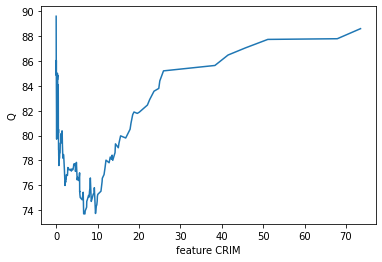

In [ ]:
# График в координатах значение порога на первый признак - значение Q
plt.plot(data_train["CRIM"], quals)
plt.xlabel("feature CRIM")
plt.ylabel("Q");

Оптимум достигается в районе CRIM = 7.

Теперь повторим процедуру вычисления Q для каждого признака.

Обратите внимание: чтобы было удобно сравнивать значение критерия для разных признаков, следует изобразить все на одном графике. Но шкала (множество значений) у каждого признака своя. Поэтому по оси x будем отмечать числа от 0 до длины выборки (номера записей в наборе данных), и величину оптимального порога по графику будет определить нельзя. По графику мы сможем определить только оптимальный признак для разделения.

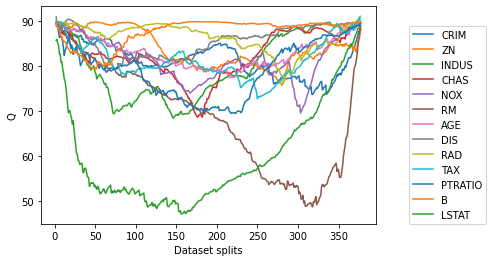

In [ ]:
for feat in data_train.columns[:-1]:
    quals = []
    data_train.sort_values(feat, inplace=True)
    for i in range(data_train.shape[0]):
        quality = data_train["target"][:i].std()**2 * i/data_train.shape[0] + data_train["target"][i:].std()**2 * (1-i/data_train.shape[0])
        quals.append(quality)
    plt.plot(quals, label=feat)
plt.xlabel("Dataset splits")
plt.ylabel("Q")
plt.legend(loc=(1.1, 0));

Наименьшее значение критерия из всех линий достигается на коричневой линии RM. Изобразим график для этого признака отдельно (со значениями порога по оси абсцисс): 

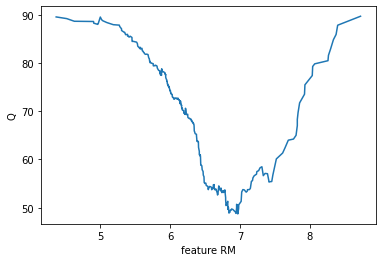

In [ ]:
feat = "RM"
quals = []
data_train.sort_values(feat, inplace=True)
for i in range(data_train.shape[0]):
    quality = data_train["target"][:i].std()**2 * i/data_train.shape[0] + \
    data_train["target"][i:].std()**2 * (1-i/data_train.shape[0])
    quals.append(quality)
plt.plot(data_train[feat], quals)
plt.xlabel("feature "+feat)
plt.ylabel("Q");

Оптимальная величина порога:

In [ ]:
not_nan_mask = np.logical_not(np.isnan(quals))
quals = np.array(quals)[not_nan_mask]
threshs = data_train[feat].values[not_nan_mask]
thresh = threshs[np.argmin(quals)]
print(thresh)

6.968


Изобразим выборку в осях RM - target и изобразим порог, по которому следует выполнять разделение:

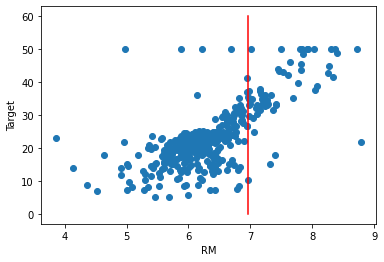

In [ ]:
plt.scatter(data_train["RM"], data_train["target"])
plt.plot([thresh, thresh], [0, 60], color="red")
plt.xlabel("RM")
plt.ylabel("Target");

Видно, что большинство точек справа от красной линии лежит выше 30, а слева - ниже, т. е. этот признак действительно хорошо разделяет выборку.